In [1]:
import pandas as pd
import tables
import sklearn

In [2]:
list1 = []

In [3]:
#Retrieve 10,000 .h5 files
import os
directory = '/Users/liamvanleynseele/Downloads/MillionSongSubset/data/A'
for root, dirs, files in os.walk(directory, topdown=False):
    for name in files:
        #print(os.path.join(root, name))
        x = os.path.join(root, name)
        list1.append(x)
        

In [4]:
len(list1)

7620

In [5]:
def get_artist_familiarity(h5,songidx=0):
    """
    Get artist familiarity from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_familiarity[songidx]

def get_artist_hotttnesss(h5,songidx=0):
    """
    Get artist hotttnesss from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_hotttnesss[songidx]

def get_artist_location(h5,songidx=0):
    """
    Get artist location from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_location[songidx]

def get_artist_name(h5,songidx=0):
    """
    Get artist name from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.artist_name[songidx]

def get_song_hotttnesss(h5,songidx=0):
    """
    Get song hotttnesss from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.song_hotttnesss[songidx]

def get_title(h5,songidx=0):
    """
    Get title from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.title[songidx]

def get_song_id(h5,songidx=0):
    """
    Get song id from a HDF5 song file, by default the first song in it
    """
    return h5.root.metadata.songs.cols.song_id[songidx]

def get_similar_artists(h5,songidx=0):
    """
    Get similar artists array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.metadata.songs.nrows == songidx + 1:
        return h5.root.metadata.similar_artists[h5.root.metadata.songs.cols.idx_similar_artists[songidx]:]
    return h5.root.metadata.similar_artists[h5.root.metadata.songs.cols.idx_similar_artists[songidx]:
                                            h5.root.metadata.songs.cols.idx_similar_artists[songidx+1]]

def get_analysis_sample_rate(h5,songidx=0):
    """
    Get analysis sample rate from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.analysis_sample_rate[songidx]


def get_duration(h5,songidx=0):
    """
    Get duration from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.duration[songidx]

def get_key(h5,songidx=0):
    """
    Get key from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.key[songidx]


def get_loudness(h5,songidx=0):
    """
    Get loudness from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.loudness[songidx]

def get_mode(h5,songidx=0):
    """
    Get mode from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.mode[songidx]

def get_tempo(h5,songidx=0):
    """
    Get tempo from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.tempo[songidx]

def get_time_signature(h5,songidx=0):
    """
    Get signature from a HDF5 song file, by default the first song in it
    """
    return h5.root.analysis.songs.cols.time_signature[songidx]


def get_segments_start(h5,songidx=0):
    """
    Get segments start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_start[h5.root.analysis.songs.cols.idx_segments_start[songidx]:]
    return h5.root.analysis.segments_start[h5.root.analysis.songs.cols.idx_segments_start[songidx]:
                                           h5.root.analysis.songs.cols.idx_segments_start[songidx+1]]
    
def get_segments_confidence(h5,songidx=0):
    """
    Get segments confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_confidence[h5.root.analysis.songs.cols.idx_segments_confidence[songidx]:]
    return h5.root.analysis.segments_confidence[h5.root.analysis.songs.cols.idx_segments_confidence[songidx]:
                                                h5.root.analysis.songs.cols.idx_segments_confidence[songidx+1]]

def get_segments_pitches(h5,songidx=0):
    """
    Get segments pitches array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_pitches[h5.root.analysis.songs.cols.idx_segments_pitches[songidx]:,:]
    return h5.root.analysis.segments_pitches[h5.root.analysis.songs.cols.idx_segments_pitches[songidx]:
                                             h5.root.analysis.songs.cols.idx_segments_pitches[songidx+1],:]

def get_segments_timbre(h5,songidx=0):
    """
    Get segments timbre array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_timbre[h5.root.analysis.songs.cols.idx_segments_timbre[songidx]:,:]
    return h5.root.analysis.segments_timbre[h5.root.analysis.songs.cols.idx_segments_timbre[songidx]:
                                            h5.root.analysis.songs.cols.idx_segments_timbre[songidx+1],:]

def get_segments_loudness_max(h5,songidx=0):
    """
    Get segments loudness max array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_max[h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx]:]
    return h5.root.analysis.segments_loudness_max[h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx]:
                                                  h5.root.analysis.songs.cols.idx_segments_loudness_max[songidx+1]]

def get_segments_loudness_max_time(h5,songidx=0):
    """
    Get segments loudness max time array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_max_time[h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx]:]
    return h5.root.analysis.segments_loudness_max_time[h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx]:
                                                       h5.root.analysis.songs.cols.idx_segments_loudness_max_time[songidx+1]]

def get_segments_loudness_start(h5,songidx=0):
    """
    Get segments loudness start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.segments_loudness_start[h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx]:]
    return h5.root.analysis.segments_loudness_start[h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx]:
                                                    h5.root.analysis.songs.cols.idx_segments_loudness_start[songidx+1]]

def get_sections_start(h5,songidx=0):
    """
    Get sections start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.sections_start[h5.root.analysis.songs.cols.idx_sections_start[songidx]:]
    return h5.root.analysis.sections_start[h5.root.analysis.songs.cols.idx_sections_start[songidx]:
                                           h5.root.analysis.songs.cols.idx_sections_start[songidx+1]]

def get_sections_confidence(h5,songidx=0):
    """
    Get sections confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.sections_confidence[h5.root.analysis.songs.cols.idx_sections_confidence[songidx]:]
    return h5.root.analysis.sections_confidence[h5.root.analysis.songs.cols.idx_sections_confidence[songidx]:
                                                h5.root.analysis.songs.cols.idx_sections_confidence[songidx+1]]

def get_beats_start(h5,songidx=0):
    """
    Get beats start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:]
    return h5.root.analysis.beats_start[h5.root.analysis.songs.cols.idx_beats_start[songidx]:
                                        h5.root.analysis.songs.cols.idx_beats_start[songidx+1]]

def get_beats_confidence(h5,songidx=0):
    """
    Get beats confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:]
    return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:
                                             h5.root.analysis.songs.cols.idx_beats_confidence[songidx+1]]

def get_bars_start(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:]
    return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:
                                       h5.root.analysis.songs.cols.idx_bars_start[songidx+1]]

def get_bars_confidence(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:]
    return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:
                                            h5.root.analysis.songs.cols.idx_bars_confidence[songidx+1]]




In [6]:


def get_beats_confidence(h5,songidx=0):
    """
    Get beats confidence array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:]
    return h5.root.analysis.beats_confidence[h5.root.analysis.songs.cols.idx_beats_confidence[songidx]:
                                             h5.root.analysis.songs.cols.idx_beats_confidence[songidx+1]]

def get_bars_start(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:]
    return h5.root.analysis.bars_start[h5.root.analysis.songs.cols.idx_bars_start[songidx]:
                                       h5.root.analysis.songs.cols.idx_bars_start[songidx+1]]

def get_bars_confidence(h5,songidx=0):
    """
    Get bars start array. Takes care of the proper indexing if we are in aggregate
    file. By default, return the array for the first song in the h5 file.
    To get a regular numpy ndarray, cast the result to: numpy.array( )
    """
    if h5.root.analysis.songs.nrows == songidx + 1:
        return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:]
    return h5.root.analysis.bars_confidence[h5.root.analysis.songs.cols.idx_bars_confidence[songidx]:
                                            h5.root.analysis.songs.cols.idx_bars_confidence[songidx+1]]




In [7]:
print('liam')

liam


In [9]:
df = pd.DataFrame()

#for i in range(len(list1)):
for i in range(100):
    hdfFile = pd.HDFStore(list1[i],mode = 'r')
    #hdfFile = pd.read_hdf(list1[i],mode = 'r')
    df = df.append({'Title': get_title(hdfFile).decode('UTF-8'), 
                        'Artist Name': get_artist_name(hdfFile).decode('UTF-8'),
                        'Artist Hotness': get_artist_hotttnesss(hdfFile),
                        'Artist Location':get_artist_location(hdfFile),
                       
                        'Analysis Sample Rate':get_analysis_sample_rate(hdfFile),
                        'Duration':get_duration(hdfFile),
                        'Key':get_key(hdfFile),
                        'Time Signature':get_time_signature(hdfFile),
                        'familiarity': get_artist_familiarity(hdfFile),
                        'time signature': get_time_signature(hdfFile),
                        'loudness': get_loudness(hdfFile),
                        'song hotness': get_song_hotttnesss(hdfFile),
                        'tempo':get_tempo(hdfFile),
                        'mode': get_mode(hdfFile),
                        #'Similar Artists':get_similar_artists(hdfFile),
                        
                        'Segment Starts':get_segments_start(hdfFile),
                        'Segment Confidence':get_segments_confidence(hdfFile),
                        'Segment Pitches':get_segments_pitches(hdfFile),
                        'Segment Timbre':get_segments_timbre(hdfFile),
                        'Segment Loudness Max':get_segments_loudness_max(hdfFile),
                        'Segment Loudness Max Time':get_segments_loudness_max_time(hdfFile),
                        'Segment Loudness Starts':get_segments_loudness_start(hdfFile),
                        'Segment Section Starts':get_sections_start(hdfFile),
                        'Sections Confidene':get_sections_confidence(hdfFile),
                        'Beats Starts':get_beats_start(hdfFile),
                        'Beats Confidence':get_beats_confidence(hdfFile),
                        'Bars Starts':get_bars_start(hdfFile),
                        'Bars Confidence':get_bars_confidence(hdfFile),
                       }, 

                       ignore_index=True)

    hdfFile.close()



print(df)

     Analysis Sample Rate  Artist Hotness  \
0                 22050.0        0.386152   
1                 22050.0        0.434860   
2                 22050.0        0.000000   
3                 22050.0        0.334520   
4                 22050.0        0.311616   
5                 22050.0        0.363676   
6                 22050.0        0.553566   
7                 22050.0        0.440135   
8                 22050.0        0.539245   
9                 22050.0        0.358149   
10                22050.0        0.592439   
11                22050.0        0.389499   
12                22050.0        0.455559   
13                22050.0        0.403588   
14                22050.0        0.335936   
15                22050.0        0.422721   
16                22050.0        0.376940   
17                22050.0        0.791143   
18                22050.0        0.311617   
19                22050.0        0.300918   
20                22050.0        0.390466   
21        

In [29]:
df.head()

#print(df['Segment Start'][0])

,Analysis Sample Rate,Artist Hotness,Artist Location,Artist Name,Bars Confidence,Bars Starts,Beats Confidence,Beats Starts,Duration,Key,...,Segment Starts,Segment Timbre,Time Signature,Title,familiarity,loudness,mode,song hotness,tempo,time signature
0,22050.0,0.386152,b'France',Raphaël,"[0.179, 0.373, 0.127, 0.015, 0.012, 0.119, 0.0...","[0.52458, 2.4444, 4.3658, 6.30006, 8.22086, 10...","[0.886, 0.725, 0.748, 0.721, 0.784, 0.417, 0.4...","[0.04257, 0.52458, 1.00659, 1.48632, 1.96605, ...",148.74077,0.0,...,"[0.0, 0.19188, 0.60499, 0.84939, 1.10018, 1.36...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",4.0,Je Sais Que La Terre Est Plate,0.557460,-9.636,1.0,0.547953,124.059,4.0
1,22050.0,0.434860,b'',Julie Zenatti,"[0.716, 0.306, 0.015, 0.572, 0.529, 0.353, 0.2...","[8.69527, 12.01758, 14.81363, 20.09003, 22.693...","[0.773, 0.247, 0.402, 0.115, 0.092, 0.436, 0.5...","[0.59161, 1.33555, 2.07949, 2.82093, 3.56238, ...",252.99546,1.0,...,"[0.0, 0.51379, 0.89138, 1.30912, 1.65297, 2.05...","[[0.008, 170.986, 9.126, -28.685, 57.183, -50....",4.0,On Efface,0.626958,-11.061,0.0,0.475638,80.084,4.0
2,22050.0,0.000000,b'',The Baltimore Consort,"[0.014, 0.025, 0.049, 0.029, 0.11, 0.484, 0.35...","[1.95344, 6.35701, 10.70579, 15.07913, 19.4832...","[0.506, 0.467, 0.45, 0.682, 0.341, 0.406, 0.38...","[1.95344, 3.0622, 4.16548, 5.26467, 6.35701, 7...",78.02730,3.0,...,"[0.0, 0.97365, 1.34431, 1.81351, 2.19764, 2.44...","[[1.337, 145.247, -43.274, -47.807, 18.519, -4...",4.0,Howells Delight,0.425724,-24.140,1.0,NaN,54.874,4.0
3,22050.0,0.334520,b'',I Hate Sally,"[0.095, 0.147, 0.157, 0.191, 0.115, 0.222, 0.2...","[0.39309, 2.75109, 5.13649, 7.52978, 9.95582, ...","[0.862, 0.509, 0.011, 0.39, 0.479, 0.422, 0.45...","[0.39309, 1.17222, 1.95902, 2.75109, 3.55236, ...",163.63057,7.0,...,"[0.0, 0.07306, 0.36862, 0.64739, 0.79238, 1.04...","[[14.832, -56.33, 69.981, -43.028, 138.861, 58...",3.0,Martha Served,0.611495,-5.795,1.0,NaN,77.150,3.0
4,22050.0,0.311616,b'',Orlando Pops Orchestra,"[0.32, 0.081, 0.567, 0.328, 0.112, 0.004, 0.09...","[0.99301, 2.99441, 4.96889, 6.9402, 8.92127, 1...","[0.382, 0.374, 0.464, 0.343, 0.553, 0.49, 0.63...","[0.49266, 0.99301, 1.49336, 1.99371, 2.49406, ...",199.99302,10.0,...,"[0.0, 0.3166, 0.82195, 1.2751, 1.80871, 2.3314...","[[10.095, 38.901, 84.505, -190.87, 59.787, 25....",4.0,Zip-A-Dee-Doo-Dah (Song of the South),0.367255,-16.477,1.0,NaN,120.382,4.0


In [11]:
df2=df[['Artist Hotness','Analysis Sample Rate','Duration','Key', 'Time Signature','familiarity','time signature','loudness', 'tempo','mode']]
df2.head()


,Artist Hotness,Analysis Sample Rate,Duration,Key,Time Signature,familiarity,time signature,loudness,tempo,mode
0,0.386152,22050.0,148.74077,0.0,4.0,0.557460,4.0,-9.636,124.059,1.0
1,0.434860,22050.0,252.99546,1.0,4.0,0.626958,4.0,-11.061,80.084,0.0
2,0.000000,22050.0,78.02730,3.0,4.0,0.425724,4.0,-24.140,54.874,1.0
3,0.334520,22050.0,163.63057,7.0,3.0,0.611495,3.0,-5.795,77.150,1.0
4,0.311616,22050.0,199.99302,10.0,4.0,0.367255,4.0,-16.477,120.382,1.0


In [28]:
df3=df[['Segment Starts','Segment Confidence','Segment Pitches', 'Segment Timbre',
        'Segment Loudness Max','Segment Loudness Max Time','Segment Loudness Starts','Segment Section Starts',
        'Sections Confidene','Beats Starts','Beats Confidence','Bars Starts','Bars Confidence']]
                                                                                                     
    
df3.head()


,Segment Starts,Segment Confidence,Segment Pitches,Segment Timbre,Segment Loudness Max,Segment Loudness Max Time,Segment Loudness Starts,Segment Section Starts,Sections Confidene,Beats Starts,Beats Confidence,Bars Starts,Bars Confidence
0,"[0.0, 0.19188, 0.60499, 0.84939, 1.10018, 1.36...","[0.0, 0.732, 1.0, 0.556, 1.0, 0.584, 0.559, 1....","[[0.726, 0.112, 0.02, 0.019, 0.01, 0.038, 0.03...","[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...","[-60.0, -52.849, -42.59, -41.542, -32.881, -34...","[0.0, 0.19543, 0.02958, 0.0238, 0.02788, 0.020...","[-60.0, -60.0, -55.39, -46.295, -48.97, -39.43...","[0.0, 7.74174, 40.30707, 80.4797, 89.656, 127....","[1.0, 1.0, 0.508, 0.334, 0.113, 0.593]","[0.04257, 0.52458, 1.00659, 1.48632, 1.96605, ...","[0.886, 0.725, 0.748, 0.721, 0.784, 0.417, 0.4...","[0.52458, 2.4444, 4.3658, 6.30006, 8.22086, 10...","[0.179, 0.373, 0.127, 0.015, 0.012, 0.119, 0.0..."
1,"[0.0, 0.51379, 0.89138, 1.30912, 1.65297, 2.05...","[0.0, 1.0, 0.276, 0.54, 0.009, 0.53, 0.624, 0....","[[0.943, 1.0, 0.91, 0.782, 0.726, 0.806, 0.314...","[[0.008, 170.986, 9.126, -28.685, 57.183, -50....","[-59.854, -31.966, -33.722, -34.887, -36.92, -...","[0.46727, 0.08541, 0.0262, 0.05198, 0.05883, 0...","[-60.0, -59.869, -37.121, -39.899, -38.511, -3...","[0.0, 7.08047, 39.03442, 89.26989, 114.94898, ...","[1.0, 0.502, 0.721, 0.552, 0.575, 0.704, 0.332...","[0.59161, 1.33555, 2.07949, 2.82093, 3.56238, ...","[0.773, 0.247, 0.402, 0.115, 0.092, 0.436, 0.5...","[8.69527, 12.01758, 14.81363, 20.09003, 22.693...","[0.716, 0.306, 0.015, 0.572, 0.529, 0.353, 0.2..."
2,"[0.0, 0.97365, 1.34431, 1.81351, 2.19764, 2.44...","[0.121, 1.0, 1.0, 0.616, 0.742, 0.237, 0.775, ...","[[1.0, 0.926, 0.264, 0.384, 0.298, 0.261, 0.22...","[[1.337, 145.247, -43.274, -47.807, 18.519, -4...","[-57.038, -34.87, -27.931, -27.929, -26.243, -...","[0.96943, 0.11297, 0.10248, 0.13633, 0.08612, ...","[-60.0, -57.069, -44.994, -35.805, -34.676, -3...","[0.0, 13.98322, 29.36585, 42.60077]","[1.0, 0.163, 0.07, 0.06]","[1.95344, 3.0622, 4.16548, 5.26467, 6.35701, 7...","[0.506, 0.467, 0.45, 0.682, 0.341, 0.406, 0.38...","[1.95344, 6.35701, 10.70579, 15.07913, 19.4832...","[0.014, 0.025, 0.049, 0.029, 0.11, 0.484, 0.35..."
3,"[0.0, 0.07306, 0.36862, 0.64739, 0.79238, 1.04...","[0.0, 1.0, 0.345, 0.437, 0.047, 0.365, 0.482, ...","[[0.835, 0.639, 0.492, 0.399, 0.326, 0.697, 0....","[[14.832, -56.33, 69.981, -43.028, 138.861, 58...","[-41.332, -7.537, -9.059, -9.55, -8.652, -9.24...","[0.0486, 0.04473, 0.01745, 0.02479, 0.09025, 0...","[-60.0, -41.859, -13.428, -14.469, -13.079, -1...","[0.0, 8.33166, 37.94071, 63.53617, 82.18998, 9...","[1.0, 0.744, 0.36, 0.628, 0.147, 0.093]","[0.39309, 1.17222, 1.95902, 2.75109, 3.55236, ...","[0.862, 0.509, 0.011, 0.39, 0.479, 0.422, 0.45...","[0.39309, 2.75109, 5.13649, 7.52978, 9.95582, ...","[0.095, 0.147, 0.157, 0.191, 0.115, 0.222, 0.2..."
4,"[0.0, 0.3166, 0.82195, 1.2751, 1.80871, 2.3314...","[1.0, 0.875, 0.782, 0.819, 0.413, 0.751, 0.316...","[[0.014, 0.014, 0.246, 0.037, 0.078, 0.322, 0....","[[10.095, 38.901, 84.505, -190.87, 59.787, 25....","[-35.258, -31.204, -28.303, -26.411, -28.011, ...","[0.16177, 0.11733, 0.07996, 0.1559, 0.10929, 0...","[-60.0, -42.284, -36.763, -38.886, -31.946, -3...","[0.0, 8.42605, 32.81331, 64.19633, 74.73863, 1...","[1.0, 0.171, 0.658, 0.609, 0.551, 0.591, 0.525...","[0.49266, 0.99301, 1.49336, 1.99371, 2.49406, ...","[0.382, 0.374, 0.464, 0.343, 0.553, 0.49, 0.63...","[0.99301, 2.99441, 4.96889, 6.9402, 8.92127, 1...","[0.32, 0.081, 0.567, 0.328, 0.112, 0.004, 0.09..."


In [36]:
from sklearn.cluster import KMeans


#kmeans = KMeans(n_clusters=10, random_state=0).fit(df3)


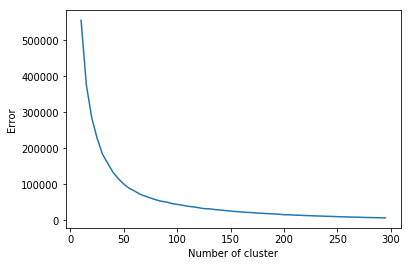

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_clust=[]
error=[]

for i in range(10,300,5):
#for i in range(10,100,5):
    num_clust.append(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df2)
    #kmeans.labels_
    error.append(kmeans.inertia_)




#kmeans.predict([[0.557460,4,7.63,150.059,0]])
#kmeans.cluster_centers_


plt.xlabel('Number of cluster')
plt.ylabel('Error')
plt.plot(num_clust,error)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



X_new = SelectKBest(chi2, k=2).fit_transform(df2, df2)

ValueError: Input X must be non-negative.

In [103]:
from sklearn.cluster import AgglomerativeClustering


clustering = AgglomerativeClustering(n_clusters=10, compute_full_tree=True).fit(df2)
#print(clustering)

#clustering.inertia_
clustering.labels_


"""KMeans(n_clusters=10, random_state=0)
KMeans.labels_=clustering.labels_
"""


clust=KMeans(n_clusters=10, random_state=0)#.fit(df2)


clust.labels_=clustering.labels_


#clust.inertia_


AttributeError: 'KMeans' object has no attribute 'inertia_'

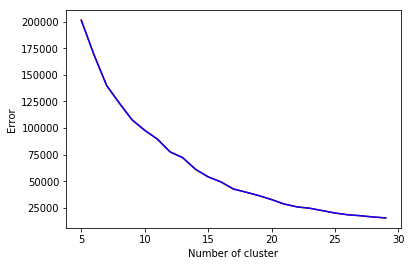

In [91]:

num_clust=[]
kerror=[]
aerror=[]


#for i in range(10,300,10):
for i in range(5,30):
    num_clust.append(i)
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df2)
    #kmeans.labels_
    kerror.append(kmeans.inertia_)
    
    clustering = AgglomerativeClustering(n_clusters=10, compute_full_tree=True).fit(df2)
    kmeans.labels_=clustering.labels_
    aerror.append(kmeans.inertia_)
    
    
plt.xlabel('Number of cluster')
plt.ylabel('Error')
plt.plot(num_clust,kerror,'r',num_clust,aerror,'b')





In [ ]:
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs





In [52]:
# from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=50, min_samples=10).fit(df2)
clustering.labels_

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0])

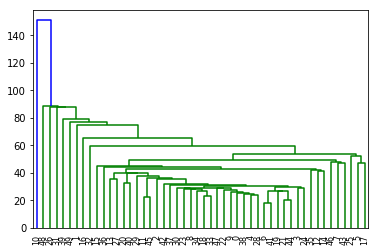

In [18]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=50, random_state=0).fit(df2)

Z = hierarchy.linkage(kmeans.cluster_centers_, 'single')
plt.figure()
dn = hierarchy.dendrogram(Z)

In [17]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=10, compute_full_tree=True).fit(df2)


#clustering.children_

clustering.labels_

#clustering = AgglomerativeClustering(n_clusters=10, compute_full_tree=True).fit_predict(df2)
#clustering


array([5, 3, 9, 3, 2, 1, 6, 3, 1, 3, 8, 8, 3, 3, 1, 4, 1, 2, 3, 2, 2, 1,
       4, 3, 1, 1, 1, 5, 1, 1, 2, 3, 2, 7, 2, 2, 8, 2, 2, 8, 4, 1, 5, 8,
       4, 3, 4, 8, 3, 5, 8, 5, 3, 4, 6, 3, 8, 4, 8, 1, 9, 5, 1, 1, 3, 4,
       3, 8, 5, 0, 2, 5, 8, 5, 3, 5, 3, 5, 4, 3, 3, 6, 0, 3, 8, 3, 6, 3,
       0, 2, 5, 3, 1, 0, 1, 5, 4, 2, 8, 6, 4, 2, 5, 1, 6, 2, 3, 9, 5, 1,
       9, 4, 1, 2, 4, 7, 6, 2, 2, 0, 6, 2, 6, 2, 2, 5, 3, 6, 4, 1, 6, 9,
       2, 4, 5, 5, 3, 9, 2, 9, 3, 5, 8, 0, 9, 2, 1, 1, 4, 0, 5, 3, 6, 8,
       5, 6, 2, 5, 1, 3, 8, 4, 1, 4, 5, 5, 3, 8, 1, 8, 9, 6, 3, 2, 3, 5,
       8, 4, 1, 6, 1, 1, 5, 5, 6, 1, 4, 2, 1, 1, 5, 6, 1, 3, 8, 0, 6, 1,
       6, 1, 1, 8, 8, 4, 5, 2, 6, 4, 8, 5, 1, 3, 3, 2, 8, 6, 3, 8, 3, 3,
       2, 8, 2, 8, 5, 8, 4, 1, 2, 2, 8, 3, 1, 8, 3, 0, 0, 1, 2, 2, 3, 4,
       4, 4, 4, 4, 8, 2, 5, 2, 9, 5, 1, 5, 5, 5, 2, 8, 1, 2, 0, 1, 6, 5,
       5, 2, 4, 2, 2, 2, 1, 9, 8, 8, 5, 5, 8, 0, 5, 6, 5, 5, 8, 4, 8, 1,
       5, 2, 1, 5, 0, 2, 1, 2, 2, 8, 1, 6, 6, 2, 3,